# Heart Disease Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plot in notebook
%matplotlib inline 
#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

# EDA

In [2]:
#create a data dictionary-like what each feature means, what to find, etc.
df=pd.read_csv('data/heart-disease-calssification/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


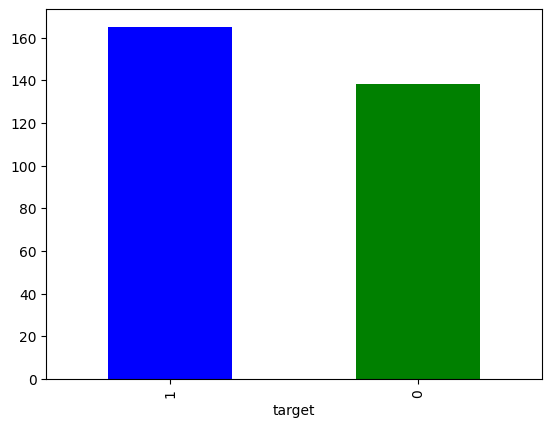

In [3]:
df.target.value_counts().plot(kind='bar', color=['blue', 'green']);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## compare features e.g how 'sex' affects target

In [5]:
#compare features e.g how 'sex' affects target
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

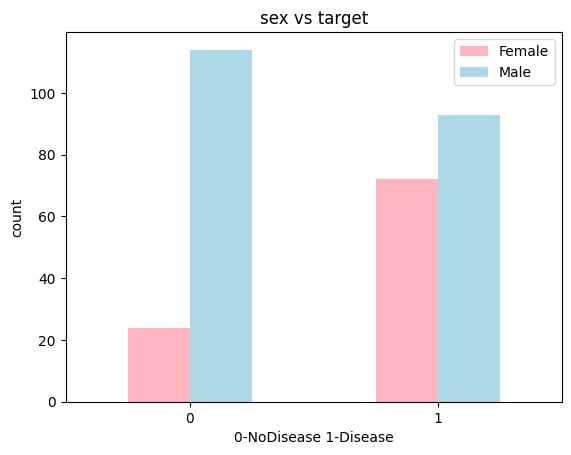

In [6]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['lightpink','lightblue'])
plt.xlabel("0-NoDisease 1-Disease")
plt.ylabel("count")
plt.legend(['Female','Male'])
plt.title('sex vs target')
plt.xticks(rotation=0);

## 'age' vs max heart rate 'thalach'

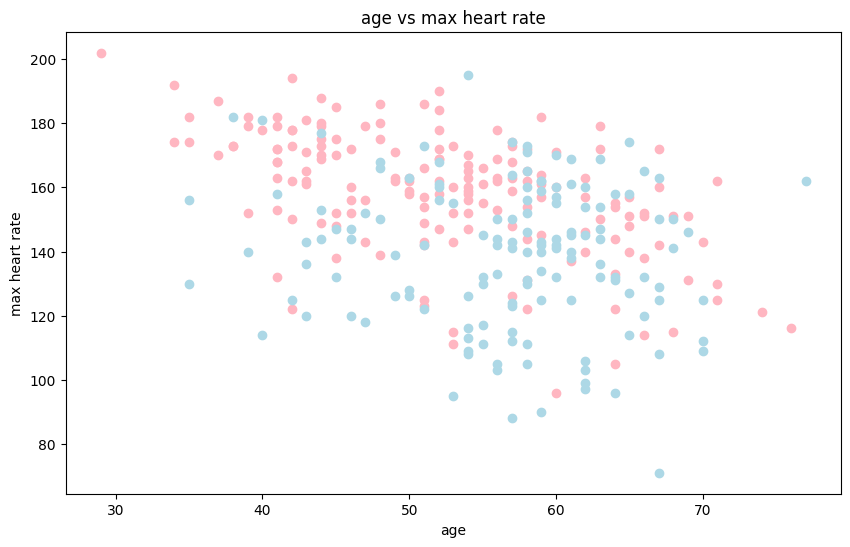

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="lightpink") #compare for traget=1
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c="lightblue")#for target=0
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.title('age vs max heart rate');

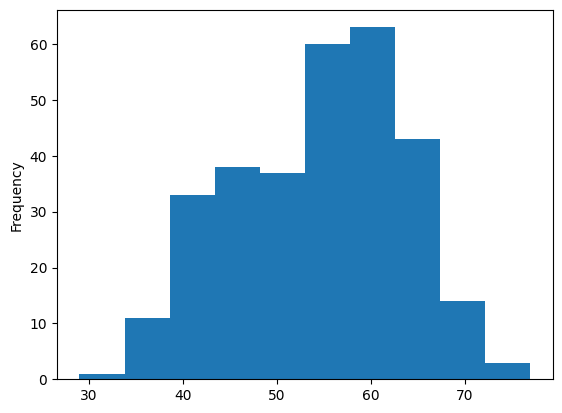

In [8]:
#find any outliers e.g in 'age' 150 or 5 wld be outliers wrt current dataset
df.age.plot(kind="hist");

## chest pain tytpe 'cp' vs 'target'

In [9]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


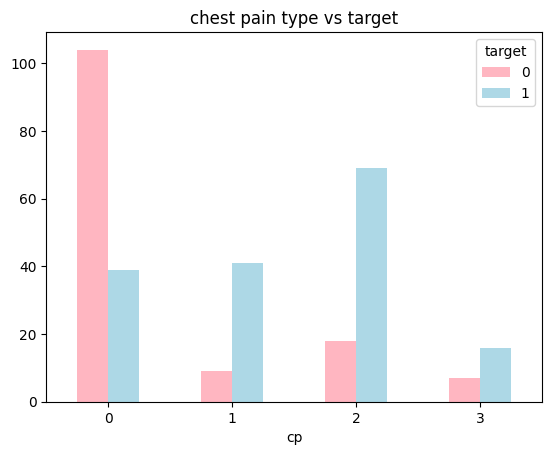

In [10]:
pd.crosstab(df.cp, df.target).plot(kind='bar', color=['lightpink', 'lightblue'])
plt.xticks(rotation=0)
plt.title('chest pain type vs target');

## correaltion btw features

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


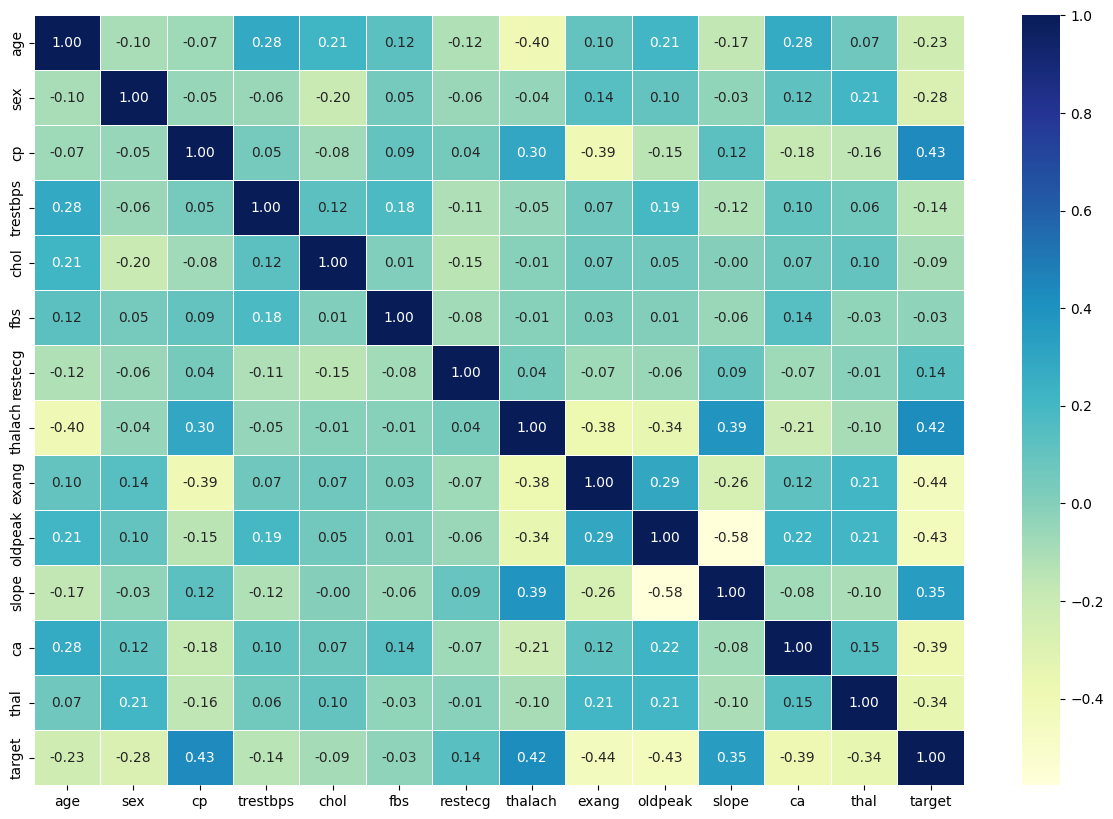

In [12]:
corr_mat=df.corr() 
'''
if +ve then features are directly proportional
if -ve then feature are inversly prportional i.e one decreases then other increases
'''
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat, 
               annot=True,
               linewidth=0.5,
               fmt='.2f',
               cmap='YlGnBu');

# Modelling

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
# split data
X=df.drop('target', axis=1)
y=df.target

In [15]:
#train-test split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #shuffles n splits 80/20

Try 3 models: Logistic Regression, KNN, Random Forest

In [16]:
#dict of models
models={"LR":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "RF":RandomForestClassifier()}
#func to fit and score models
def fun1(models, X_train, X_test, y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        #store key-value of model scores in dict
        model_score[name]=model.score(X_test,y_test)
    return model_score

In [17]:
model_scores=fun1(models,X_train,X_test,y_train,y_test)
model_scores

c:\Users\sathv\Desktop\eda\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8852459016393442, 'KNN': 0.6885245901639344, 'RF': 0.8360655737704918}

## Hyperparameter tuning (by hand)

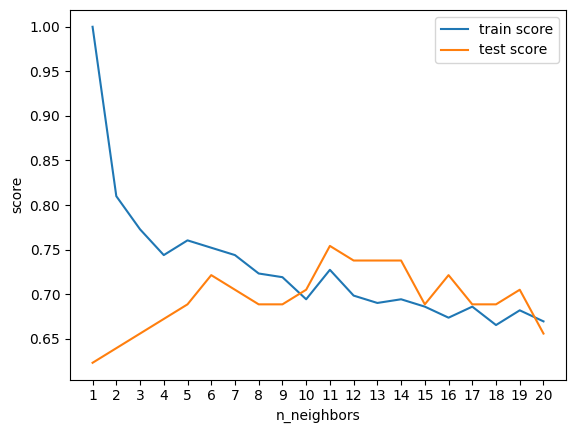

In [18]:
train_score=[]
test_score=[]
knn=KNeighborsClassifier()
for i in range(1,21):
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

plt.plot(range(1,21), train_score,label='train score')
plt.plot(range(1,21), test_score,label='test score')
plt.xticks(range(1,21))
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend();

In [19]:
max(test_score)

0.7540983606557377

## Hyperparameter tuning with RandomizedSearchCV

In [20]:
#create grid for LR
lr_grid={"C":np.logspace(-4,4,20),
         "solver":["liblinear"]}

#..for RF
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None, 3,5,10],
         "min_samples_leaf":np.arange(1,20,2)}

In [21]:
#tununng using RandomzedSearchCV
np.random.seed(42)

lr_rs=RandomizedSearchCV(LogisticRegression(),
                        param_distributions=lr_grid,
                        n_iter=20,
                        cv=5,
                        verbose=True)
rf_rs=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

lr_rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
lr_rs.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [23]:
lr_rs.score(X_test,y_test)

0.8852459016393442

In [24]:
rf_rs.fit(X_train,y_train)    

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
rf_rs.best_params_

{'n_estimators': np.int64(410),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [26]:
rf_rs.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning usig GridSearchCV

In [27]:
lr_grid={"C":np.logspace(-4,4,30),
         "solver":["liblinear"]}
lr_gs=GridSearchCV(LogisticRegression(),
                   param_grid=lr_grid,
                   cv=5,
                   verbose=True)
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [28]:
lr_gs.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [29]:
lr_gs.score(X_test,y_test)

0.8852459016393442

## Evaluating LR model

In [30]:
y_preds=lr_gs.predict(X_test)

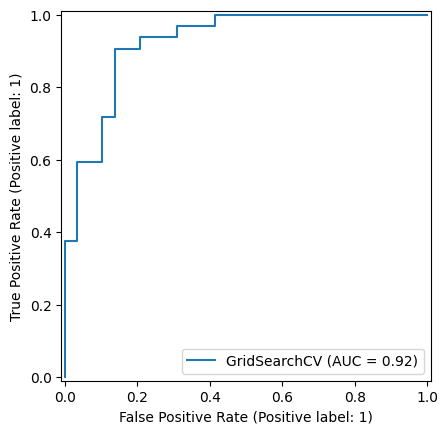

In [31]:
RocCurveDisplay.from_estimator(lr_gs,X_test,y_test);

In [32]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


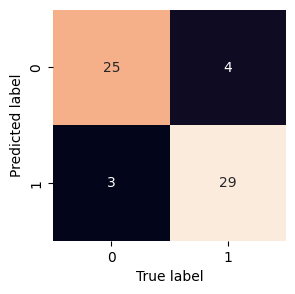

In [33]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [34]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [35]:
# Calculate calssification report using cross_val_score

lr_gs.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [36]:
model=LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [37]:
# cross validated metrics
cv_acc=cross_val_score(model,X,y,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [38]:
cv_acc=np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [39]:
cv_precision=cross_val_score(model,X,y,scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [40]:
cv_recall=cross_val_score(model,X,y,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [41]:
cv_f1=cross_val_score(model,X,y,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

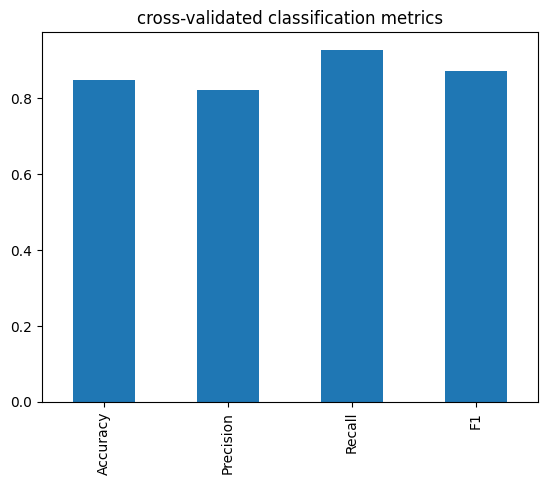

In [42]:
# visualize all metrics
cv_metrics=pd.DataFrame({'Accuracy':cv_acc,
                         'Precision':cv_precision,
                         'Recall':cv_recall,
                         'F1':cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title='cross-validated classification metrics',legend=False);

## Feature Importance

In [43]:
model=LogisticRegression(C=0.20433597178569418, solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [44]:
model.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [45]:
feature_dict=dict(zip(df.columns,list(model.coef_[0])))
feature_dict

{'age': np.float64(0.0032076873709286024),
 'sex': np.float64(-0.8606204735539111),
 'cp': np.float64(0.6600143086174385),
 'trestbps': np.float64(-0.01155970641957489),
 'chol': np.float64(-0.0016649609500147373),
 'fbs': np.float64(0.04017238940156104),
 'restecg': np.float64(0.3160340177157746),
 'thalach': np.float64(0.02458922261936637),
 'exang': np.float64(-0.6047017032281077),
 'oldpeak': np.float64(-0.567954572983317),
 'slope': np.float64(0.4508539117301764),
 'ca': np.float64(-0.6373332602422034),
 'thal': np.float64(-0.6755508982355707)}

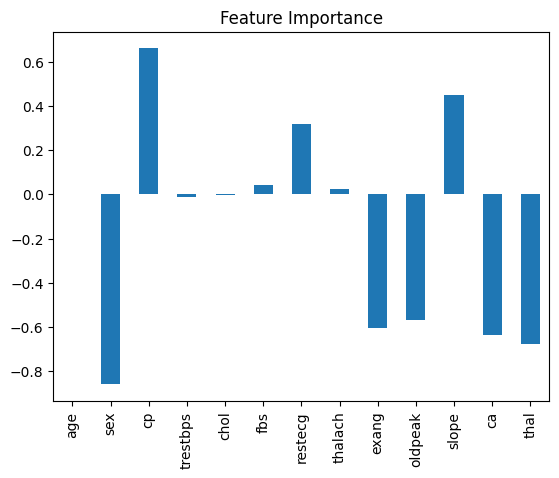

In [46]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [47]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [48]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
